# Starbucks Capstone Challenge Notebook



## Background : 

The businesses want to target right customers throughout the customer journey which helps to reduce the marketing budget, customer satisfaction as well increase the profits.  Machine learning (ML) and artificial intelligence (AI) technologies are helping automate the digital marketing with real time decision making such as selecting best messaging platform, best timing, and the best offering to the individual customer by integrating data from different platforms \cite{linkedin,digitalmarketinginstitute,urbancursor,medium}.

Udacity's Starbucks Capstone challenge project  data set contains simulated data that mimics customer behavior on the Starbucks rewards mobile app. Machine learning technique will be used in order to develop effective marketing strategy for the Starbucks business using the available data.  


# Problem Statement 

Starbucks sends out an offer to users of the mobile app every few days. An offer can be merely an advertisement for a drink or an actual offer such as a discount or BOGO (buy one get one free). The given dataset contains demographic data a record of transaction and details about offer information. Before developing a predictive model, exploratory data analysis and customer segmentation will be carried out which will help Starbucks business in better targeted marketing.  

\textit{It is important to know your customers in order to increase business. First, customer segmentation using unsupervised machine learning technique K-means clustering will be carried out to understand current customer characteristics and demographics. Second  the best performing supervised machine learning model will be build by comparing random forest and boosting ensemble models performance based on the defined metrics to predict if customer will respond to an offer or not for better targeted marketing. }


# Project Design 

Following are the project design steps carried out to execute this project

## Part I 
- Data Exploration & : First step is to know the data. Matplotlib/Seaborn/plotly libraries will be used for the exploratory data analysis (EDA). Study the data statistic, count missing values, plot different variables and understand and explore the data.
- Model pre-processing and cleaning : Basic cleaning steps such as filling missing, checking outliers, dropping unimportant and duplicate columns, Encoding categorical variables..
## Part II
 Data Wranglling -  scaling, and feature engineering. 
## Part II
- Next, customer segmentation will be carried out to group the demographic and purchase data.  
- Train and Test data : Labeled dataset will be prepared and split randomly to train and test dataset. 
## Part III
- Model training and implementation : Five different models will be implemented and based on the AUC value and other metrics, best model will be selected. 
- Model validation : Test data will be used to validate the model performance with defined metrics. 
- Model selection and optimization : Selected model will be tuned using a grid search. 
    
# Challanges 

- Not all users receive the same offer
- Different validity period the offer type and informational offer to influence customer.
- Customer might make a purchase through the app without having received an offer or seen an offer
- A user can receive an offer, never actually view the offer, and still complete the offer


# Data Sets

The data is contained in three files:

* portfolio.json - containing offer ids and meta data about each offer (duration, type, etc.)
* profile.json - demographic data for each customer
* transcript.json - records for transactions, offers received, offers viewed, and offers completed

Here is the schema and explanation of each variable in the files:

**portfolio.json**
* id (string) - offer id
* offer_type (string) - type of offer ie BOGO, discount, informational
* difficulty (int) - minimum required spend to complete an offer
* reward (int) - reward given for completing an offer
* duration (int) - time for offer to be open, in days
* channels (list of strings)

**profile.json**
* age (int) - age of the customer 
* became_member_on (int) - date when customer created an app account
* gender (str) - gender of the customer (note some entries contain 'O' for other rather than M or F)
* id (str) - customer id
* income (float) - customer's income

**transcript.json**
* event (str) - record description (ie transaction, offer received, offer viewed, etc.)
* person (str) - customer id
* time (int) - time in hours since start of test. The data begins at time t=0
* value - (dict of strings) - either an offer id or transaction amount depending on the record



# Reference
https://stackoverflow.com/questions/27298178/concatenate-strings-from-several-rows-using-pandas-groupby/45925961
https://stackoverflow.com/questions/51102205/how-to-know-the-labels-assigned-by-astypecategory-cat-codes
https://stackoverflow.com/questions/45312377/how-to-one-hot-encode-from-a-pandas-column-containing-a-list
https://stackoverflow.com/questions/50522146/pandas-column-dict-split-to-new-column-and-rows
https://stackoverflow.com/questions/56421683/how-to-apply-a-function-for-each-row-of-a-dataframe-which-checks-keys-of-embedd
https://stackoverflow.com/questions/41455967/convert-datetime-string-to-new-columns-of-day-month-year-in-pandas-data-frame/41456152

https://stackoverflow.com/questions/43133605/convert-integer-yyyymmdd-to-date-format-mm-dd-yyyy-in-python
https://stackoverflow.com/questions/17134716/convert-dataframe-column-type-from-string-to-datetime-dd-mm-yyyy-format

https://stackoverflow.com/questions/49742938/checking-isdigit-on-python
 https://towardsdatascience.com/flattening-json-objects-in-python-f5343c794b10

In [1]:
import pandas as pd
import numpy as np
import math
import json
import matplotlib.pyplot as plt
import matplotlib
#% matplotlib inline|



# Part 1 :  Initial Dataset Statistics and basic EDA



## summary of portfolio statistics
- profile dataframe has age, gender catgorical features which we will need to encode
- become member on need to be changed to membership years.
- age max value 118 - looks like outlier
- only income and gender columns have more missing values - 2175 which are corresponding to age outlier. We will check overall missing values in the combined dataset to decided if we need to impute or delete missing values.



def basic_EDA(df):
    

def plot_hist(df)



In [2]:
# read in the json files
portfolio = pd.read_json('portfolio.json', orient='records', lines=True)

# Check size of the data set
print('portfolio  shape is {}:' .format(portfolio.shape)) 



portfolio  shape is (10, 6):


In [3]:
# Check size of the basic statistics
print('portfolio statistics  {}:' .format(portfolio.describe())) 
print('portfolio null count {}:' .format(portfolio.isnull().sum())) 
 

portfolio statistics         difficulty   duration     reward
count   10.000000  10.000000  10.000000
mean     7.700000   6.500000   4.200000
std      5.831905   2.321398   3.583915
min      0.000000   3.000000   0.000000
25%      5.000000   5.000000   2.000000
50%      8.500000   7.000000   4.000000
75%     10.000000   7.000000   5.000000
max     20.000000  10.000000  10.000000:
portfolio null count channels      0
difficulty    0
duration      0
id            0
offer_type    0
reward        0
dtype: int64:


In [4]:
print('portfolio data   {}:' .format(portfolio.info()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
channels      10 non-null object
difficulty    10 non-null int64
duration      10 non-null int64
id            10 non-null object
offer_type    10 non-null object
reward        10 non-null int64
dtypes: int64(3), object(3)
memory usage: 560.0+ bytes
portfolio data   None:


In [5]:
# cleaning function portfolio
# credit -  https://stackoverflow.com/questions/45312377/how-to-one-hot-encode-from-a-pandas-column-containing-a-list
# credit - https://stackoverflow.com/questions/29034928/pandas-convert-a-column-of-list-to-dummies
# credit -https://stackoverflow.com/questions/45312377/how-to-one-hot-encode-from-a-pandas-column-containing-a-list/45312577#45312577

def portfolio_clean(portfolio):

    """ 
    Clean, select and transform a DataFrame containing information about offer type and duration
    INPUT:
        portfolio: DataFrame containing offer ids and meta data about 
                   each offer (duration, type, etc.)
    OUTPUT:
        portfolio: clean transformed portfolio DataFrame
    """  
    
   # portfolio = portfolio.assign(**pd.get_dummies(portfolio.channels.apply(lambda x:pd.Series(x)).stack()
                                                    #.reset_index(level=1,drop=True)).sum(level=0))
    #portfolio = portfolio.assign(**pd.get_dummies(portfolio.offer_type.apply(lambda x:pd.Series(x)).stack()
                                                   # .reset_index(level=1,drop=True)).sum(level=0))
    #portfolio['id'] = [offer_id_col[item] for item in portfolio_df['id']] 
    portfolio.rename(columns={'id':'offer_id', 'reward': 'reward_offered'}, inplace =True)
    
    #offer_type_col = {'bogo':'1', 'informational':'2','discount':'3'}
    #portfolio['offer_type'] = [offer_type_col[item] for item in portfolio['offer_type']] 
    
    portfolio.drop(['channels'], axis=1, inplace=True)
    
    return portfolio



In [6]:
portfolio_df=portfolio_clean(portfolio)

In [7]:
portfolio_df.head()

,difficulty,duration,offer_id,offer_type,reward_offered
0,10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10
1,10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10
2,0,4,3f207df678b143eea3cee63160fa8bed,informational,0
3,5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5
4,20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,5


## summary of profile statistics
- profile dataset
-
-

In [8]:
# read in the json files

profile = pd.read_json('profile.json', orient='records', lines=True)
# Check size of the data set
print('profile  shape is {}:' .format(profile.shape)) 
 


profile  shape is (17000, 5):


In [9]:
print('profile statistics  {}:' .format(profile.describe())) 
print('profile data   {}:' .format(profile.info())) 
print('profile null count{}:' .format(profile.isnull().sum()))

profile statistics                  age  became_member_on         income
count  17000.000000      1.700000e+04   14825.000000
mean      62.531412      2.016703e+07   65404.991568
std       26.738580      1.167750e+04   21598.299410
min       18.000000      2.013073e+07   30000.000000
25%       45.000000      2.016053e+07   49000.000000
50%       58.000000      2.017080e+07   64000.000000
75%       73.000000      2.017123e+07   80000.000000
max      118.000000      2.018073e+07  120000.000000:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 5 columns):
age                 17000 non-null int64
became_member_on    17000 non-null int64
gender              14825 non-null object
id                  17000 non-null object
income              14825 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 664.1+ KB
profile data   None:
profile null countage                    0
became_member_on       0
gender              2175
id     

In [10]:
# cleaning function profile
# credit -  https://stackoverflow.com/questions/43133605/convert-integer-yyyymmdd-to-date-format-mm-dd-yyyy-in-python
import datetime

def profile_clean(profile):

    """ 
    Clean, select and transform a DataFrame containing a demographic data for each customer
    INPUT:
        profile: DataFrame containing offer ids and meta data about 
                   each offer (duration, type, etc.)
    OUTPUT:
        profile: clean and transformed profile DataFrame
    """  
    #profile['date_time']  = profile[['became_member_on']].applymap(str).applymap(lambda s: "{}/{}/{}"
                                                                                # .format( s[0:4],s[4:6],s[6:]))
        # We can calculate membershipt years using became member on data to see how long customer is starbucks member
    profile['date_time'] =pd.to_datetime(profile['became_member_on'], format = '%Y%m%d')
    end_time =(datetime.datetime.today().date())
    start_time =(profile['date_time'].dt.date)
    
    profile['membership_years']=  (end_time -start_time)
    profile['membership_years'] = round((pd.to_numeric(profile['membership_years'].dt.days, downcast='integer'))/365,2)
   
                            
    # only gender and income column showed nan values. We will clean the data # dropped data comment
    profile= profile.dropna(axis=0, subset=['gender'])
    
    # keep only year unless want to calculate membership period then we may need month and date 
    profile['year'] = pd.DatetimeIndex(profile['date_time']).year   

    profile.rename(columns={'id':'customer_id'}, inplace =True)
    profile.drop(['date_time', 'became_member_on'], axis=1,inplace=True)

    return profile


In [11]:
profile_df=profile_clean(profile)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [12]:
profile_df.head()

,age,gender,customer_id,income,membership_years,year
1,55,F,0610b486422d4921ae7d2bf64640c50b,112000.0,2.67,2017
3,75,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0,2.85,2017
5,68,M,e2127556f4f64592b11af22de27a7932,70000.0,1.89,2018
8,65,M,389bc3fa690240e798340f5a15918d5c,53000.0,2.10,2018
12,58,M,2eeac8d8feae4a8cad5a6af0499a211d,51000.0,2.35,2017



## summary of transcript statistics
- transcript dataframe
-b
-a
-c
-d




In [13]:
# read in the json files
transcript = pd.read_json('transcript.json', orient='records', lines=True)

# Check size of the data set
print('transcript  shape is {}: ' .format(transcript.shape)) 


transcript  shape is (306534, 4): 


In [14]:
print('transcript statistics  {}:' .format(transcript.describe())) 

print('transcript data   {}:' .format(transcript.info()))  

print('transcript null count{}: ' .format(transcript.isnull().sum())) 

transcript statistics                  time
count  306534.000000
mean      366.382940
std       200.326314
min         0.000000
25%       186.000000
50%       408.000000
75%       528.000000
max       714.000000:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 4 columns):
event     306534 non-null object
person    306534 non-null object
time      306534 non-null int64
value     306534 non-null object
dtypes: int64(1), object(3)
memory usage: 9.4+ MB
transcript data   None:
transcript null countevent     0
person    0
time      0
value     0
dtype: int64: 


In [15]:
transcript.head()

,event,person,time,value
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}
1,offer received,a03223e636434f42ac4c3df47e8bac43,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}
2,offer received,e2127556f4f64592b11af22de27a7932,0,{'offer id': '2906b810c7d4411798c6938adc9daaa5'}
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}
4,offer received,68617ca6246f4fbc85e91a2a49552598,0,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}


In [16]:
# transcript value contains amount related to transaction, offer id and reward given 
transcript.tail(5)

,event,person,time,value
306529,transaction,b3a1272bc9904337b331bf348c3e8c17,714,{'amount': 1.5899999999999999}
306530,transaction,68213b08d99a4ae1b0dcb72aebd9aa35,714,{'amount': 9.53}
306531,transaction,a00058cf10334a308c68e7631c529907,714,{'amount': 3.61}
306532,transaction,76ddbd6576844afe811f1a3c0fbb5bec,714,{'amount': 3.5300000000000002}
306533,transaction,c02b10e8752c4d8e9b73f918558531f7,714,{'amount': 4.05}


In [17]:
# cleaning function transcript
# credit - https://stackoverflow.com/questions/58383927/convert-series-of-dict-and-concat-to-dataframe
#https://stackoverflow.com/questions/38134012/pandas-dataframe-fillna-only-some-columns-in-place

def transcript_clean(transcript):

    """ 
    Clean, select and transform a DataFrame containing the records for transactions,
    offer types : received, viewed, completed
    INPUT:
        transcript: DataFrame containing records of transaction, customer id, time and value
                   each offer (duration, type, etc.)
    OUTPUT:
        transcript: clean and transformed transcript DataFrame
    """  
    # value column contains disctionary with amount, reward and offer id 
    # it results in nan columns which we will clean later
    transcript = pd.concat([transcript, transcript['value'].apply(pd.Series)], axis = 1)
   # transcript = transcript.assign(**pd.get_dummies(transcript.event.apply(lambda x:pd.Series(x)).stack()
                                                   # .reset_index(level=1,drop=True)).sum(level=0))
    
    # we will delete offer_id column , it contains duplicate/missing information from offer id related to reward - 
    #we can fill that information from offer_id column - reward offer id
    transcript['offer_id'].fillna(transcript['offer id'],inplace=True)
    transcript.rename(columns={'person':'customer_id', 'reward':'reward_given'}, inplace =True)
    
    #convert number of days - time column to 
    transcript['time'] = round(transcript['time']/24).astype(int)
    #transcript= pd.concat([transcript, pd.get_dummies(transcript['event'])], axis= 1)
    transcript.drop(['value', 'offer id'], axis=1,inplace=True)

    return transcript

In [18]:
transcript_df=transcript_clean(transcript)

In [19]:
transcript_df.head()

,event,customer_id,time,amount,offer_id,reward_given
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN
1,offer received,a03223e636434f42ac4c3df47e8bac43,0,NaN,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN
2,offer received,e2127556f4f64592b11af22de27a7932,0,NaN,2906b810c7d4411798c6938adc9daaa5,NaN
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0,NaN,fafdcd668e3743c1bb461111dcafc2a4,NaN
4,offer received,68617ca6246f4fbc85e91a2a49552598,0,NaN,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN


## Missing Value Analysis 
Rule of thumb, if there is less than 5% of missing data and features are not important then we can delete. However, We have almost 12.79% missing customer profile. It belongs to gender and income  columns.

To further understand mising data : We will have a closer look at the combined dataframe. We can check that how it can affect overall segmentation analysis and offer predictions modeling. 
Total trasaction - 306534
total completed offer with nan gender and age/total trasaction = 3.37% missing data 
checking how many transactions for income and age data with missing values = 10.79%


It is recommonded to impute data with mean or median values or predict the missing value. 
However, we will delete these values, since offer related missing trasaction data is less than 5%. 

https://medium.com/@george.drakos62/handling-missing-values-in-machine-learning-part-1-dda69d4f88ca

In [20]:
print('Missing data percentage in the profile dataset ')
print(profile.isna().sum()*100/(len(profile)))

Missing data percentage in the profile dataset 
age                  0.000000
became_member_on     0.000000
gender              12.794118
id                   0.000000
income              12.794118
date_time            0.000000
membership_years     0.000000
dtype: float64


In [21]:
df_merged=pd.merge(transcript_df, profile_df, on='customer_id', how='left')

In [151]:
df_merged.fillna(0)

,event,customer_id,time,amount,offer_id,reward_given,age,gender,income,membership_years,year
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,0.00,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.0,75.0,F,100000.0,2.85,2017.0
1,offer received,a03223e636434f42ac4c3df47e8bac43,0,0.00,0b1e1539f2cc45b7b9fa7c272da2e1d7,0.0,0.0,0,0.0,0.00,0.0
2,offer received,e2127556f4f64592b11af22de27a7932,0,0.00,2906b810c7d4411798c6938adc9daaa5,0.0,68.0,M,70000.0,1.89,2018.0
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0,0.00,fafdcd668e3743c1bb461111dcafc2a4,0.0,0.0,0,0.0,0.00,0.0
4,offer received,68617ca6246f4fbc85e91a2a49552598,0,0.00,4d5c57ea9a6940dd891ad53e9dbe8da0,0.0,0.0,0,0.0,0.00,0.0
5,offer received,389bc3fa690240e798340f5a15918d5c,0,0.00,f19421c1d4aa40978ebb69ca19b0e20d,0.0,65.0,M,53000.0,2.10,2018.0
6,offer received,c4863c7985cf408faee930f111475da3,0,0.00,2298d6c36e964ae4a3e7e9706d1fb8c2,0.0,0.0,0,0.0,0.00,0.0
7,offer received,2eeac8d8feae4a8cad5a6af0499a211d,0,0.00,3f207df678b143eea3cee63160fa8bed,0.0,58.0,M,51000.0,2.35,2017.0
8,offer received,aa4862eba776480b8bb9c68455b8c2e1,0,0.00,0b1e1539f2cc45b7b9fa7c272da2e1d7,0.0,61.0,F,57000.0,2.51,2017.0
9,offer received,31dda685af34476cad5bc968bdb01c53,0,0.00,0b1e1539f2cc45b7b9fa7c272da2e1d7,0.0,62.0,F,71000.0,4.10,2016.0


In [163]:
df_merged.head()

,event,customer_id,time,amount,offer_id,reward_given,age,gender,income,membership_years,year,total_transaction_amount
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,75.0,F,100000.0,2.85,2017.0,NaN
1,offer received,a03223e636434f42ac4c3df47e8bac43,0,NaN,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,offer received,e2127556f4f64592b11af22de27a7932,0,NaN,2906b810c7d4411798c6938adc9daaa5,NaN,68.0,M,70000.0,1.89,2018.0,NaN
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0,NaN,fafdcd668e3743c1bb461111dcafc2a4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,offer received,68617ca6246f4fbc85e91a2a49552598,0,NaN,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [153]:
# We will lose very less offer related information. 
temp_1=df_merged[(df_merged['gender'].isna())&(df_merged['event']=='offer completed')]
temp_2 = df_merged[(df_merged['event']=='offer completed')]
print('missing offer completed data :',(len(temp_1)*100)/(len(temp_2)), '%')

missing offer completed data : 3.3800887459424045 %


In [154]:
temp_3 = df_merged[(df_merged['gender'].isna())&(df_merged['event']=='transaction')]
temp_4 = df_merged[(df_merged['event']=='transaction')]
print('missing  transaction data :',(len(temp_3)*100)/(len(temp_4)),'%')


missing  transaction data : 10.79213834893813 %


event
offer completed     33579
offer received      76277
offer viewed        57725
transaction        138953
Name: customer_id, dtype: int64

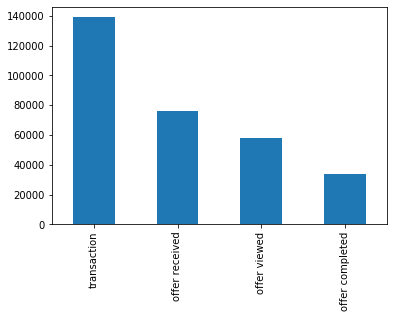

In [155]:
transcript_df['event'].value_counts().plot.bar()
transcript_df.groupby(['event']).customer_id.count()

In [156]:
df_merged.describe()

,time,amount,reward_given,age,income,membership_years,year,total_transaction_amount
count,306534.000000,138953.000000,33579.000000,272762.000000,272762.000000,272762.000000,272762.000000,0.0
mean,15.261883,12.777356,4.904137,53.840696,64337.000755,3.233709,2016.457435,NaN
std,8.356520,30.250529,2.886647,17.551337,21243.762941,1.174850,1.218663,NaN
min,0.000000,0.050000,2.000000,18.000000,30000.000000,1.640000,2013.000000,NaN
25%,8.000000,2.780000,2.000000,41.000000,48000.000000,2.300000,2016.000000,NaN
50%,17.000000,8.890000,5.000000,55.000000,62000.000000,2.930000,2017.000000,NaN
75%,22.000000,18.070000,5.000000,66.000000,78000.000000,4.000000,2017.000000,NaN
max,30.000000,1062.280000,10.000000,101.000000,120000.000000,6.640000,2018.000000,NaN


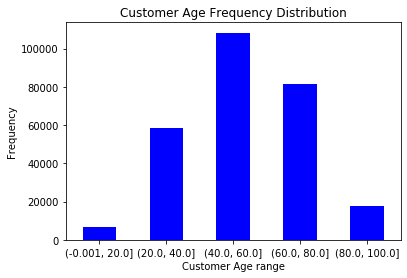

In [157]:
#https://stackoverflow.com/questions/43005462/pandas-bar-plot-with-binned-range
# plot function everything together
import seaborn as sns
age_bin = pd.cut(df_merged['age'], bins=[0, 20, 40, 60, 80,100], include_lowest=True)

ax = age_bin.value_counts(sort=False).plot.bar(rot=0, color="b", figsize=(6,4))
#ax.set_xticklabels([ c[1:-1].replace(","," to") for c in age_bin.cat.categories])
plt.xlabel('Customer Age range')
plt.ylabel('Frequency')
plt.title('Customer Age Frequency Distribution')
plt.show()




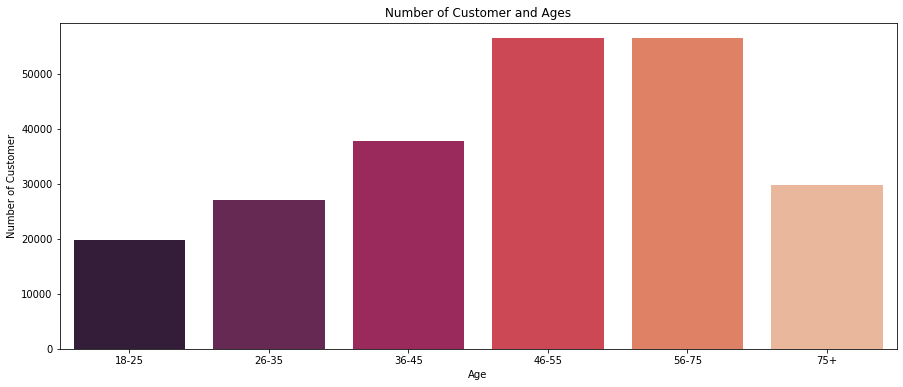

In [158]:
age18_25 = df_merged.age[(df_merged.age <= 25) & (df_merged.age >= 18)]
age26_35 = df_merged.age[(df_merged.age <= 35) & (df_merged.age >= 26)]
age36_45 = df_merged.age[(df_merged.age <= 45) & (df_merged.age >= 36)]
age46_55 = df_merged.age[(df_merged.age <= 55) & (df_merged.age >= 46)]
age56_75 = df_merged.age[(df_merged.age <= 75) & (df_merged.age >= 56)]
age75above = df_merged.age[df_merged.age >= 76]
x = ["18-25","26-35","36-45","46-55","56-75","75+"]
y = [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age46_55.values),len(age75above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()

In [160]:
df_merged.describe()

,time,amount,reward_given,age,income,membership_years,year,total_transaction_amount
count,306534.000000,138953.000000,33579.000000,272762.000000,272762.000000,272762.000000,272762.000000,0.0
mean,15.261883,12.777356,4.904137,53.840696,64337.000755,3.233709,2016.457435,NaN
std,8.356520,30.250529,2.886647,17.551337,21243.762941,1.174850,1.218663,NaN
min,0.000000,0.050000,2.000000,18.000000,30000.000000,1.640000,2013.000000,NaN
25%,8.000000,2.780000,2.000000,41.000000,48000.000000,2.300000,2016.000000,NaN
50%,17.000000,8.890000,5.000000,55.000000,62000.000000,2.930000,2017.000000,NaN
75%,22.000000,18.070000,5.000000,66.000000,78000.000000,4.000000,2017.000000,NaN
max,30.000000,1062.280000,10.000000,101.000000,120000.000000,6.640000,2018.000000,NaN


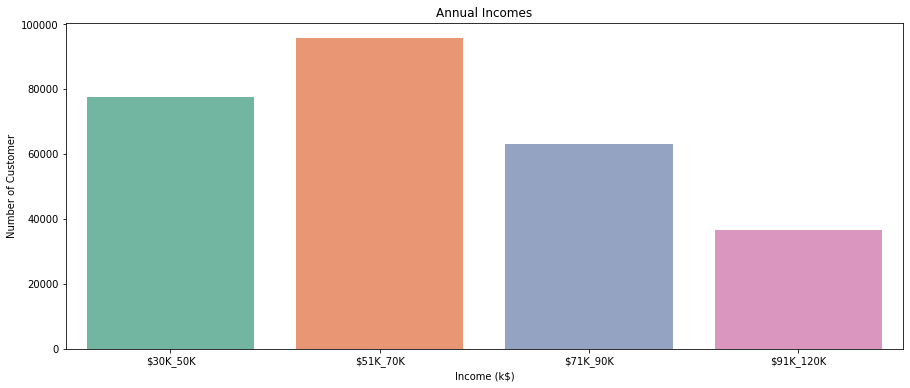

In [159]:
in30K_50K = df_merged['income'][(df_merged['income'] >= 30000) & (df_merged['income'] <= 50000)]
in51K_70K = df_merged['income'][(df_merged['income'] >= 50001) & (df_merged['income'] <= 70000)]
in71K_90K = df_merged['income'][(df_merged['income'] >= 70001) & (df_merged['income'] <= 90000)]
in91K_120K = df_merged['income'][(df_merged['income'] >= 90001) & (df_merged['income'] <= 120000)]
#ai121_150 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 121) & (df["Annual Income (k$)"] <= 12000)]

aix = [ "$30K_50K", "$51K_70K", "$71K_90K", "$91K_120K"]
aiy = [len(in30K_50K.values), len(in51K_70K.values), len(in71K_90K.values), len(in91K_120K.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=aix, y=aiy, palette="Set2")
plt.title("Annual Incomes")
plt.xlabel("Income (k$)")
plt.ylabel("Number of Customer")
plt.show()

In [27]:
# lets answer questions to understand transcript dataframe

print('How many transaction are related to offer sent to the customer')
print(len(transcript_df[(transcript_df['offer_id'].notnull()) & (transcript_df['reward_given'].notnull())]))

print('How many customers did not respond to the sent offer')
print(len(transcript_df[(transcript_df['offer_id'].notnull()) & (transcript_df['reward_given'].isnull())]))

# This may contain some informational offer related transaction
print('How many customers transaction were not offer related')
print(len(transcript_df[(transcript_df['amount'].notnull())]))





How many transaction are related to offer sent to the customer
33579
How many customers did not respond to the sent offer
134002
How many customers transaction were not offer related
138953


event            offer_type   
offer completed  bogo             15669
                 discount         17910
offer received   bogo             30499
                 discount         30543
                 informational    15235
offer viewed     bogo             25449
                 discount         21445
                 informational    10831
Name: offer_type, dtype: int64

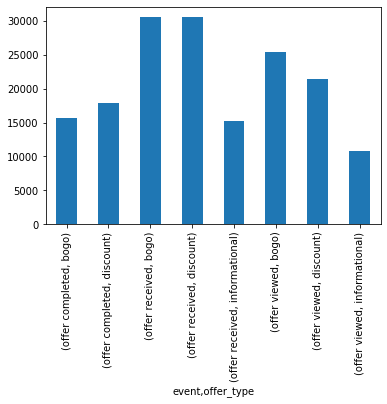

In [28]:
# check offer type and events count
df_temp = transcript_df.merge(portfolio_df,how='left',on='offer_id')

df_temp.groupby(['event','offer_type'])['offer_type'].count().plot.bar()

df_temp.groupby(['event','offer_type'])['offer_type'].count()

In [ ]:
# informational offer related transaction 


In [29]:
# Let's check how many rewards are given overall 
df_temp.groupby('offer_type')['reward_given'].count()

offer_type
bogo             15669
discount         17910
informational        0
Name: reward_given, dtype: int64

Overall startbucks promotional offer effectiveness 

## Part II
  scaling, and feature engineering. 


offer_completion_rate = Number of completed offers trasaction / Number of offers sent (all offers sum)
# Lets check how many offer related transaction
54% of data will be used to charecterize demographic#http://fluidsurveys.com/university/difference-response-rate-completion-rate/
# offer completion rate 
#df_temp2['offer_completion_rate'] =

In [32]:
df_temp.head()

,event,customer_id,time,amount,offer_id,reward_given,difficulty,duration,offer_type,reward_offered
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,5.0,7.0,bogo,5.0
1,offer received,a03223e636434f42ac4c3df47e8bac43,0,NaN,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,20.0,10.0,discount,5.0
2,offer received,e2127556f4f64592b11af22de27a7932,0,NaN,2906b810c7d4411798c6938adc9daaa5,NaN,10.0,7.0,discount,2.0
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0,NaN,fafdcd668e3743c1bb461111dcafc2a4,NaN,10.0,10.0,discount,2.0
4,offer received,68617ca6246f4fbc85e91a2a49552598,0,NaN,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN,10.0,5.0,bogo,10.0


In [33]:
# count bogo, discount and informational  offer received by customer
offer_received = df_temp[df_temp['event']=='offer received'].groupby('customer_id').offer_type.value_counts().unstack()
offer_received.reset_index(drop=False,inplace=True)
offer_received=offer_received.fillna(0)
offer_received.rename_axis(None, axis=1,inplace =True)
offer_received['total_offer_recieved'] = offer_received['bogo'] + offer_received['discount']+offer_received['informational']
offer_received['total_off_recev_bo_dis'] = offer_received['bogo'] + offer_received['discount']


offer_received.rename(columns={'bogo':'offer_recieved_bogo', 'discount':'offer_recieved_discount',
                                    'informational': 'offer_recieved_informational'},inplace =True)

In [34]:
#count offer completed by each customer
offer_completed =df_temp[df_temp['event']=='offer completed'].groupby('customer_id').offer_type.value_counts().unstack()
offer_completed.reset_index(drop=False,inplace=True)
offer_completed=offer_completed.fillna(0)
offer_completed.rename_axis(None, axis=1,inplace =True)
offer_completed['total_offer_completed'] = offer_completed['bogo'] + offer_completed['discount']
offer_completed.rename(columns={'bogo':'offer_completed_bogo', 'discount':'offer_completed_discount'}, inplace =True)

In [35]:
#count ho many offers viewed by each customer
offer_viewed =df_temp[df_temp['event']=='offer viewed'].groupby('customer_id').offer_type.value_counts().unstack()
offer_viewed.reset_index(drop=False,inplace=True)
offer_viewed=offer_viewed.fillna(0)
offer_viewed['total_offer_viewed'] = offer_viewed['bogo'] + offer_viewed['discount']+offer_viewed['informational']
offer_viewed['total_off_viewed_bo+dis'] = offer_viewed['bogo'] + offer_viewed['discount']
offer_viewed['total_off_viewed_informational'] = offer_viewed['total_offer_viewed']-offer_viewed['total_off_viewed_bo+dis'] 
offer_viewed.rename(columns={'bogo':'offer_viewed_bogo', 'discount':'offer_viewed_discount',
                                    'informational': 'offer_viewed_informational'},inplace =True)

In [36]:
# calculate total transaction amount for each customer.
total_transaction_amount=df_temp.groupby('customer_id').amount.sum().to_frame().reset_index()
total_transaction_amount.rename(columns={'amount':'total_transaction_amount'},inplace=True)
# calculate total transaction count for each customer
total_transaction_count=df_temp[df_temp['event']=='transaction'].groupby('customer_id').event.count().to_frame().reset_index()
total_transaction_count.rename(columns={'event':'total_transaction_count'},inplace=True)
#calculate total reward given to each customer
total_reward_given = df_temp.groupby('customer_id').reward_given.sum().to_frame().reset_index()
total_reward_given.rename(columns={'reward_given':'total_reward_given'},inplace=True)
# calculate total offer related transaction count 
#temp4=df_temp[(transcript_dummy['transaction']==1)&((transcript_dummy['offer completed']==1))].groupby('customer_id').event.count().to_frame().reset_index()
#temp4.rename(columns={'event':'total_transaction_count'},inplace=True)

In [37]:
from functools import reduce
demographic_df=reduce(lambda x,y: pd.merge(x,y, on='customer_id', how='outer'),
                      [offer_received,offer_viewed,offer_completed,total_transaction_amount,
                       total_transaction_count,total_reward_given])

In [38]:
demographic_df.head()


,customer_id,offer_recieved_bogo,offer_recieved_discount,offer_recieved_informational,total_offer_recieved,total_off_recev_bo_dis,offer_viewed_bogo,offer_viewed_discount,offer_viewed_informational,total_offer_viewed,total_off_viewed_bo+dis,total_off_viewed_informational,offer_completed_bogo,offer_completed_discount,total_offer_completed,total_transaction_amount,total_transaction_count,total_reward_given
0,0009655768c64bdeb2e877511632db8f,1.0,2.0,2.0,5.0,3.0,1.0,1.0,2.0,4.0,2.0,2.0,1.0,2.0,3.0,127.60,8.0,9.0
1,00116118485d4dfda04fdbaba9a87b5c,2.0,0.0,0.0,2.0,2.0,2.0,0.0,0.0,2.0,2.0,0.0,NaN,NaN,NaN,4.09,3.0,0.0
2,0011e0d4e6b944f998e987f904e8c1e5,1.0,2.0,2.0,5.0,3.0,1.0,2.0,2.0,5.0,3.0,2.0,1.0,2.0,3.0,79.46,5.0,13.0
3,0020c2b971eb4e9188eac86d93036a77,2.0,2.0,1.0,5.0,4.0,1.0,1.0,1.0,3.0,2.0,1.0,1.0,2.0,3.0,196.86,8.0,14.0
4,0020ccbbb6d84e358d3414a3ff76cffd,2.0,1.0,1.0,4.0,3.0,2.0,1.0,1.0,4.0,3.0,1.0,2.0,1.0,3.0,154.05,12.0,13.0


In [39]:
# transaction only customers - i.e. transaction occured without offer
demographic_df['transaction_onlycustomers'] = np.where(demographic_df['total_offer_completed'].isnull(), 1, 0)
# offer view rate - all type of offer sent and viewed to check how much effective 
demographic_df['offer_view_rate']= demographic_df['total_offer_viewed']/demographic_df['total_offer_recieved']
# how
demographic_df['offer_completion_rate']=demographic_df['total_offer_completed']/demographic_df['total_off_recev_bo_dis']
#
demographic_df['bogo_completion_rate']=demographic_df['offer_completed_bogo']/demographic_df['offer_recieved_bogo']
#
demographic_df['discount_completion_rate']=demographic_df['offer_completed_discount']/demographic_df['offer_recieved_discount']
# informational offer completion rate - if transaction followed by informational offer
demographic_df['informational_view_rate']=demographic_df['offer_viewed_informational']/demographic_df['offer_recieved_informational']
# we will calculate total_offer_completion_rate after we obtaine informational offer 
#demographic_df['informational_completion_rate']=demographic_df['offer_completed_informational']/demographic_df['offer_recieved_informational']

In [40]:
demographic_df.fillna(0).head()

,customer_id,offer_recieved_bogo,offer_recieved_discount,offer_recieved_informational,total_offer_recieved,total_off_recev_bo_dis,offer_viewed_bogo,offer_viewed_discount,offer_viewed_informational,total_offer_viewed,...,total_offer_completed,total_transaction_amount,total_transaction_count,total_reward_given,transaction_onlycustomers,offer_view_rate,offer_completion_rate,bogo_completion_rate,discount_completion_rate,informational_view_rate
0,0009655768c64bdeb2e877511632db8f,1.0,2.0,2.0,5.0,3.0,1.0,1.0,2.0,4.0,...,3.0,127.60,8.0,9.0,0,0.8,1.00,1.0,1.0,1.0
1,00116118485d4dfda04fdbaba9a87b5c,2.0,0.0,0.0,2.0,2.0,2.0,0.0,0.0,2.0,...,0.0,4.09,3.0,0.0,1,1.0,0.00,0.0,0.0,0.0
2,0011e0d4e6b944f998e987f904e8c1e5,1.0,2.0,2.0,5.0,3.0,1.0,2.0,2.0,5.0,...,3.0,79.46,5.0,13.0,0,1.0,1.00,1.0,1.0,1.0
3,0020c2b971eb4e9188eac86d93036a77,2.0,2.0,1.0,5.0,4.0,1.0,1.0,1.0,3.0,...,3.0,196.86,8.0,14.0,0,0.6,0.75,0.5,1.0,1.0
4,0020ccbbb6d84e358d3414a3ff76cffd,2.0,1.0,1.0,4.0,3.0,2.0,1.0,1.0,4.0,...,3.0,154.05,12.0,13.0,0,1.0,1.00,1.0,1.0,1.0


# Let's confirm the values from demographic dataframe

In [41]:
demographic_df[demographic_df['customer_id'].str.match('0610b486422d4921ae7d2bf64640c50b')].head()

,customer_id,offer_recieved_bogo,offer_recieved_discount,offer_recieved_informational,total_offer_recieved,total_off_recev_bo_dis,offer_viewed_bogo,offer_viewed_discount,offer_viewed_informational,total_offer_viewed,...,total_offer_completed,total_transaction_amount,total_transaction_count,total_reward_given,transaction_onlycustomers,offer_view_rate,offer_completion_rate,bogo_completion_rate,discount_completion_rate,informational_view_rate
398,0610b486422d4921ae7d2bf64640c50b,1.0,0.0,1.0,2.0,1.0,NaN,NaN,NaN,NaN,...,1.0,77.01,3.0,5.0,0,NaN,1.0,1.0,NaN,NaN


In [42]:
df_temp[df_temp['customer_id'].str.match('0610b486422d4921ae7d2bf64640c50b')]

,event,customer_id,time,amount,offer_id,reward_given,difficulty,duration,offer_type,reward_offered
20282,transaction,0610b486422d4921ae7d2bf64640c50b,1,21.51,NaN,NaN,NaN,NaN,NaN,NaN
49501,transaction,0610b486422d4921ae7d2bf64640c50b,6,32.28,NaN,NaN,NaN,NaN,NaN,NaN
150597,offer received,0610b486422d4921ae7d2bf64640c50b,17,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,5.0,7.0,bogo,5.0
201571,offer received,0610b486422d4921ae7d2bf64640c50b,21,NaN,3f207df678b143eea3cee63160fa8bed,NaN,0.0,4.0,informational,0.0
227842,transaction,0610b486422d4921ae7d2bf64640c50b,22,23.22,NaN,NaN,NaN,NaN,NaN,NaN
227843,offer completed,0610b486422d4921ae7d2bf64640c50b,22,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,5.0,5.0,7.0,bogo,5.0


In [43]:
demographic_df.columns

Index(['customer_id', 'offer_recieved_bogo', 'offer_recieved_discount',
       'offer_recieved_informational', 'total_offer_recieved',
       'total_off_recev_bo_dis', 'offer_viewed_bogo', 'offer_viewed_discount',
       'offer_viewed_informational', 'total_offer_viewed',
       'total_off_viewed_bo+dis', 'total_off_viewed_informational',
       'offer_completed_bogo', 'offer_completed_discount',
       'total_offer_completed', 'total_transaction_amount',
       'total_transaction_count', 'total_reward_given',
       'transaction_onlycustomers', 'offer_view_rate', 'offer_completion_rate',
       'bogo_completion_rate', 'discount_completion_rate',
       'informational_view_rate'],
      dtype='object')

1) Offer receive --- offer completed
2) offer reeived---offer viwed --- trasaction --offer completed
3) offer received --- offer viewed --(unsuccessful offer)
4) trasaction - no reward and no offer id
5) offer received- offer completed -- trasaction --offer viewed 


In [44]:
final_customer_df= pd.merge(demographic_df, profile_df, on= 'customer_id', how='left')


In [45]:
final_customer_df.head()

,customer_id,offer_recieved_bogo,offer_recieved_discount,offer_recieved_informational,total_offer_recieved,total_off_recev_bo_dis,offer_viewed_bogo,offer_viewed_discount,offer_viewed_informational,total_offer_viewed,...,offer_view_rate,offer_completion_rate,bogo_completion_rate,discount_completion_rate,informational_view_rate,age,gender,income,membership_years,year
0,0009655768c64bdeb2e877511632db8f,1.0,2.0,2.0,5.0,3.0,1.0,1.0,2.0,4.0,...,0.8,1.00,1.0,1.0,1.0,33.0,M,72000.0,2.90,2017.0
1,00116118485d4dfda04fdbaba9a87b5c,2.0,0.0,0.0,2.0,2.0,2.0,0.0,0.0,2.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0011e0d4e6b944f998e987f904e8c1e5,1.0,2.0,2.0,5.0,3.0,1.0,2.0,2.0,5.0,...,1.0,1.00,1.0,1.0,1.0,40.0,O,57000.0,2.18,2018.0
3,0020c2b971eb4e9188eac86d93036a77,2.0,2.0,1.0,5.0,4.0,1.0,1.0,1.0,3.0,...,0.6,0.75,0.5,1.0,1.0,59.0,F,90000.0,4.04,2016.0
4,0020ccbbb6d84e358d3414a3ff76cffd,2.0,1.0,1.0,4.0,3.0,2.0,1.0,1.0,4.0,...,1.0,1.00,1.0,1.0,1.0,24.0,F,60000.0,3.35,2016.0


In [46]:
final_customer_df= pd.concat([final_customer_df, pd.get_dummies(final_customer_df['gender'])], axis= 1)
final_customer_df.drop(columns=['customer_id','year','gender'],inplace=True)

In [47]:
#final_customer_df.drop(columns=['gender'],inplace=True)
final_customer_df.fillna(0,inplace=True)



In [48]:
final_customer_df.isna().sum()

offer_recieved_bogo               0
offer_recieved_discount           0
offer_recieved_informational      0
total_offer_recieved              0
total_off_recev_bo_dis            0
offer_viewed_bogo                 0
offer_viewed_discount             0
offer_viewed_informational        0
total_offer_viewed                0
total_off_viewed_bo+dis           0
total_off_viewed_informational    0
offer_completed_bogo              0
offer_completed_discount          0
total_offer_completed             0
total_transaction_amount          0
total_transaction_count           0
total_reward_given                0
transaction_onlycustomers         0
offer_view_rate                   0
offer_completion_rate             0
bogo_completion_rate              0
discount_completion_rate          0
informational_view_rate           0
age                               0
income                            0
membership_years                  0
F                                 0
M                           

remove age - can not be scaled

In [49]:
final_customer_df.head()

,offer_recieved_bogo,offer_recieved_discount,offer_recieved_informational,total_offer_recieved,total_off_recev_bo_dis,offer_viewed_bogo,offer_viewed_discount,offer_viewed_informational,total_offer_viewed,total_off_viewed_bo+dis,...,offer_completion_rate,bogo_completion_rate,discount_completion_rate,informational_view_rate,age,income,membership_years,F,M,O
0,1.0,2.0,2.0,5.0,3.0,1.0,1.0,2.0,4.0,2.0,...,1.00,1.0,1.0,1.0,33.0,72000.0,2.90,0,1,0
1,2.0,0.0,0.0,2.0,2.0,2.0,0.0,0.0,2.0,2.0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0,0,0
2,1.0,2.0,2.0,5.0,3.0,1.0,2.0,2.0,5.0,3.0,...,1.00,1.0,1.0,1.0,40.0,57000.0,2.18,0,0,1
3,2.0,2.0,1.0,5.0,4.0,1.0,1.0,1.0,3.0,2.0,...,0.75,0.5,1.0,1.0,59.0,90000.0,4.04,1,0,0
4,2.0,1.0,1.0,4.0,3.0,2.0,1.0,1.0,4.0,3.0,...,1.00,1.0,1.0,1.0,24.0,60000.0,3.35,1,0,0


In [79]:
final_customer_df.columns

Index(['offer_recieved_bogo', 'offer_recieved_discount',
       'offer_recieved_informational', 'total_offer_recieved',
       'total_off_recev_bo_dis', 'offer_viewed_bogo', 'offer_viewed_discount',
       'offer_viewed_informational', 'total_offer_viewed',
       'total_off_viewed_bo+dis', 'total_off_viewed_informational',
       'offer_completed_bogo', 'offer_completed_discount',
       'total_offer_completed', 'total_transaction_amount',
       'total_transaction_count', 'total_reward_given',
       'transaction_onlycustomers', 'offer_view_rate', 'offer_completion_rate',
       'bogo_completion_rate', 'discount_completion_rate',
       'informational_view_rate', 'age', 'income', 'membership_years', 'F',
       'M', 'O', 'cluster'],
      dtype='object')

In [165]:
final_customer_df['total_transaction_amount'].describe()

count    17000.000000
mean       104.438351
std        125.922619
min          0.000000
25%         21.820000
50%         69.405000
75%        148.782500
max       1608.690000
Name: total_transaction_amount, dtype: float64

In [ ]:
#https://medium.com/@cdabakoglu/clustering-mall-customers-k-means-machine-learning-5c12d5cacbe
ss0_20 = final_customer_df['total_transaction_amount'][(final_customer_df['total_transaction_amount'] >= 1) & 
                                                       (final_customer_df['total_transaction_amount']<= 20)]
ss21_40 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 21) & (df["Spending Score (1-100)"] <= 40)]
ss41_60 = df["Spending Score (1-10final_customer_df['total_transaction_amount']0)"][(df["Spending Score (1-100)"] >= 41) & (df["Spending Score (1-100)"] <= 60)]
ss61_80 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 61) & (df["Spending Score (1-100)"] <= 80)]
ss81_100 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 81) & (df["Spending Score (1-100)"] <= 100)]

ssx = ["1-20", "21-40", "41-60", "61-80", "81-100"]
ssy = [len(ss1_20.values), len(ss21_40.values), len(ss41_60.values), len(ss61_80.values), len(ss81_100.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=ssx, y=ssy, palette="nipy_spectral_r")
plt.title("Spending Scores")
plt.xlabel("Score")
plt.ylabel("Number of Customer Having the Score")
plt.show()

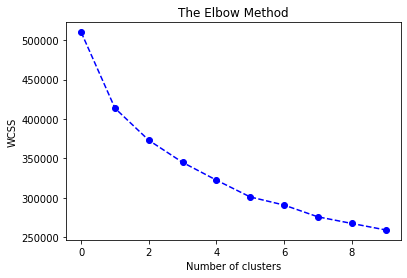

In [96]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()
customer_df_ss = ss.fit_transform(final_customer_df)

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10,random_state = 42)
    kmeans.fit(customer_df_ss)
    wcss.append(kmeans.inertia_)
plt.plot( wcss, linestyle='--', marker='o', color='b')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [118]:
# Fitting K-Means to the dataset
km_1 = KMeans(n_clusters = 3)
km_1n=km_1.fit_predict(customer_df_ss)
# assign the cluster
cluster_assigned = pd.DataFrame(ss.inverse_transform(customer_df_ss), columns = final_customer_df.columns)
cluster_assigned['cluster_label'] = km_1.labels_ 
cluster_center1 = pd.DataFrame(km_1.cluster_centers_, columns = final_customer_df.columns)


In [179]:
cluster_center1

,offer_recieved_bogo,offer_recieved_discount,offer_recieved_informational,total_offer_recieved,total_off_recev_bo_dis,offer_viewed_bogo,offer_viewed_discount,offer_viewed_informational,total_offer_viewed,total_off_viewed_bo+dis,...,bogo_completion_rate,discount_completion_rate,informational_view_rate,age,income,membership_years,F,M,O,cluster
0,-0.521749,-0.151352,0.525692,-0.274928,-0.627611,-0.502812,-0.116574,0.537613,-0.184864,-0.516042,...,0.178596,0.363470,0.476189,0.313793,0.346437,0.353495,0.203874,0.021367,0.020880,-0.743706
1,0.542843,0.249606,-0.540820,0.387874,0.739530,0.570907,0.353707,-0.474446,0.465507,0.766195,...,0.725762,0.618331,-0.406969,0.312714,0.391185,0.371501,0.225789,0.002972,0.028374,-0.070631
2,0.001761,-0.087775,-0.007644,-0.096649,-0.080812,-0.044074,-0.222319,-0.083171,-0.261135,-0.217971,...,-0.874106,-0.956100,-0.086384,-0.613555,-0.721404,-0.709602,-0.420303,-0.024223,-0.048076,0.811645


In [190]:
km_2 = KMeans(n_clusters = 3)
customer_df_ss['cluster']=km_2.fit_predict(customer_df_ss)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [99]:
cluster_center1_inv = pd.DataFrame(ss.inverse_transform(cluster_center1), columns = final_customer_df.columns)

In [186]:
cluster_center1_inv[['offer_recieved_bogo', 'offer_recieved_discount',
       'offer_recieved_informational', 'total_offer_recieved',
       'total_off_recev_bo_dis', 'offer_viewed_bogo', 'offer_viewed_discount',
       'offer_viewed_informational', 'total_offer_viewed',
       'total_off_viewed_bo+dis', 'total_off_viewed_informational',
       'offer_completed_bogo', 'offer_completed_discount',
       'total_offer_completed', 'total_transaction_amount',
       'total_transaction_count', 'total_reward_given',
       'transaction_onlycustomers', 'offer_view_rate', 'offer_completion_rate',
       'bogo_completion_rate', 'discount_completion_rate',
       'informational_view_rate', 'age', 'income', 'membership_years', 'F',
       'M', 'O', 'cluster']]

,offer_recieved_bogo,offer_recieved_discount,offer_recieved_informational,total_offer_recieved,total_off_recev_bo_dis,offer_viewed_bogo,offer_viewed_discount,offer_viewed_informational,total_offer_viewed,total_off_viewed_bo+dis,...,bogo_completion_rate,discount_completion_rate,informational_view_rate,age,income,membership_years,F,M,O,cluster
0,1.796341,1.697909,0.889547,4.383798,3.494251,1.451394,1.034669,0.574390,3.060453,2.486063,...,0.056280,0.079861,0.401025,32.454878,35556.794425,1.622578,0.158537,0.486411,0.007143,3.809408
1,2.404619,2.077105,0.425896,4.907620,4.481724,2.102746,1.623750,0.277323,4.003819,3.726496,...,0.781618,0.795639,0.251046,55.084743,68714.493544,3.233626,0.468449,0.500455,0.016367,2.338971
2,1.208991,1.627322,1.351675,4.187988,2.836313,0.964242,1.141642,1.043048,3.148932,2.105884,...,0.531490,0.678956,0.663276,55.056761,67292.483944,3.203522,0.458775,0.510328,0.014060,1.219233


In [187]:
final_customer_df['cluster'] = cluster_center1_inv['cluster']

No handles with labels found to put in legend.


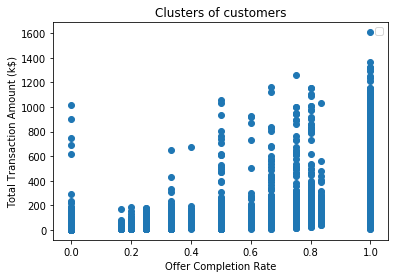

In [171]:
# Visualising the clusters
plt.scatter(cluster_assigned['offer_completion_rate'], cluster_assigned['total_transaction_amount'])
#plt.scatter(cluster_assigned['total_reward_given'], cluster_assigned['total_transaction_amount'], s = 100, label = 'Cluster 2')
#plt.scatter(cluster_assigned['membership_years'], cluster_assigned['total_transaction_amount'], s = 100, label = 'Cluster 3')
#plt.scatter(cluster_assigned['income'], cluster_assigned['total_transaction_amount'], s = 100, label = 'Cluster 4')
#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Offer Completion Rate')
plt.ylabel('Total Transaction Amount (k$)')
plt.legend()
plt.show()

In [188]:
final_customer_df.head()

,offer_recieved_bogo,offer_recieved_discount,offer_recieved_informational,total_offer_recieved,total_off_recev_bo_dis,offer_viewed_bogo,offer_viewed_discount,offer_viewed_informational,total_offer_viewed,total_off_viewed_bo+dis,...,bogo_completion_rate,discount_completion_rate,informational_view_rate,age,income,membership_years,F,M,O,cluster
0,1.0,2.0,2.0,5.0,3.0,1.0,1.0,2.0,4.0,2.0,...,1.0,1.0,1.0,33.0,72000.0,2.90,0,1,0,3.809408
1,2.0,0.0,0.0,2.0,2.0,2.0,0.0,0.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0,0,0,2.338971
2,1.0,2.0,2.0,5.0,3.0,1.0,2.0,2.0,5.0,3.0,...,1.0,1.0,1.0,40.0,57000.0,2.18,0,0,1,1.219233
3,2.0,2.0,1.0,5.0,4.0,1.0,1.0,1.0,3.0,2.0,...,0.5,1.0,1.0,59.0,90000.0,4.04,1,0,0,NaN
4,2.0,1.0,1.0,4.0,3.0,2.0,1.0,1.0,4.0,3.0,...,1.0,1.0,1.0,24.0,60000.0,3.35,1,0,0,NaN


In [134]:
from sklearn.cluster import KMeans
km_1 = KMeans(n_clusters = 3)
km_1n=km_1.fit_predict(customer_df_ss)
# assign the cluster
cluster_assigned = pd.DataFrame(ss.inverse_transform(customer_df_ss), columns = final_customer_df.columns)
cluster_assigned['cluster_label'] = km_1.labels_ 
cluster_center1 = pd.DataFrame(km_1.cluster_centers_, columns = final_customer_df.columns)

#Instructions for building the 2-D plot

#trace1 is for 'Cluster 0'
trace1 = go.Scatter(
                    x = cluster_assigned['total_transaction_amount'],
                    y = cluster_assigned['total_transaction_amount'],
                    mode = "markers",
                    name = "Cluster 0",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = None)

#trace2 is for 'Cluster 1'
trace2 = go.Scatter(
                    x = cluster_assigned['total_transaction_amount'],
                    y = cluster1["TC2_2d"],
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text = None)

#trace3 is for 'Cluster 2'
trace3 = go.Scatter(
                    x = cluster2["TC1_2d"],
                    y = cluster2["TC2_2d"],
                    mode = "markers",
                    name = "Cluster 2",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text = None)

data = [trace1, trace2, trace3]

title = "Visualizing Clusters in Two Dimensions Using T-SNE (perplexity=" + str(perplexity) + ")"

layout = dict(title = title,
              xaxis= dict(title= 'TC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'TC2',ticklen= 5,zeroline= False)
             )

fig = dict(data = data, layout = layout)

iplot(fig)

TypeError: '(array([False, False, False, ..., False, False, False]), 0)' is an invalid key

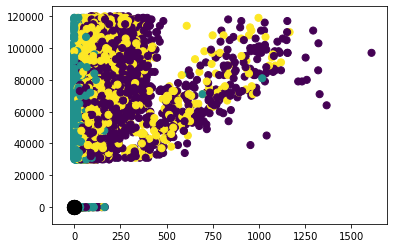

In [121]:
cluster_assigned['total_transaction_amount'][:,1]
plt.scatter(cluster_assigned['total_transaction_amount'], cluster_assigned['income'], c=km_1n, s=50, cmap='viridis',label= cluster_assigned['cluster_label'])

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);



In [138]:
cluster_assigned['total_transaction_amount']

0        127.60
1          4.09
2         79.46
3        196.86
4        154.05
5         48.34
6         68.51
7        138.36
8        347.38
9         20.36
10       144.14
11         7.21
12        33.50
13       375.12
14       121.85
15        62.93
16         6.26
17        16.18
18       279.16
19         2.54
20       105.83
21        11.78
22       166.40
23        20.73
24       218.05
25        20.53
26       133.25
27       163.92
28       219.63
29         7.74
          ...  
16970      9.63
16971    174.33
16972     22.20
16973    166.52
16974     19.92
16975      0.00
16976     33.77
16977    142.70
16978     89.44
16979      0.00
16980     43.76
16981    101.32
16982     63.49
16983    234.05
16984      9.97
16985      0.00
16986     21.35
16987    116.90
16988    291.47
16989    580.98
16990     29.94
16991     12.15
16992     88.83
16993    226.07
16994     63.25
16995     67.62
16996     86.43
16997      6.95
16998      0.35
16999     26.01
Name: total_transaction_

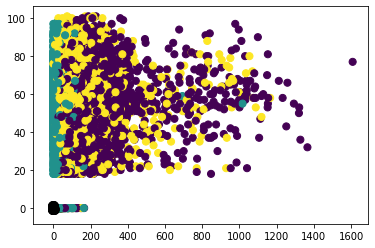

In [127]:
plt.scatter(cluster_assigned['total_transaction_amount'], cluster_assigned['age'], c=km_1n, s=50, cmap='viridis',label= cluster_assigned['cluster_label'])

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 1], centers[:, 2], c='black', s=100, alpha=1);

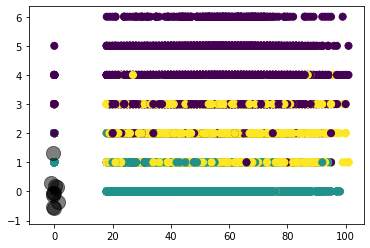

In [129]:
plt.scatter(cluster_assigned['age'], cluster_assigned['total_offer_completed'], c=km_1n, s=50, cmap='viridis',label= cluster_assigned['cluster_label'])

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

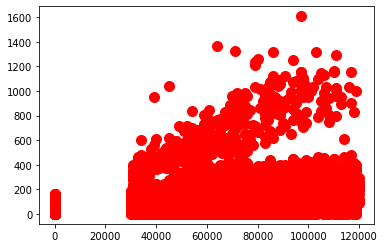

In [103]:
plt.scatter(cluster_assigned['income'], cluster_assigned['total_transaction_amount'], s = 100, c = 'red', label = 'cluster_label')

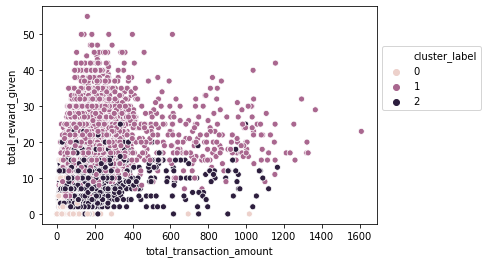

In [104]:
sns.scatterplot(cluster_assigned['total_transaction_amount'], cluster_assigned['total_reward_given'], hue= cluster_assigned['cluster_label'])
plt.legend(bbox_to_anchor=(1.00, 0.5), loc=3);

In [110]:
sns.scatterplot(cluster_assigned['gender'], cluster_assigned['total_offer_completed'], hue= cluster_assigned['cluster_label'])
plt.legend(bbox_to_anchor=(1.00, 0.5), loc=3);

KeyError: 'gender'

In [ ]:
customer_new = pd.concat([df_temp,pd.get_dummies(df_temp.event)], axis = 1).copy()

In [ ]:
customer_new.columns

In [ ]:
demographic_df.fillna(0).head()

In [ ]:
df_customer=pd.merge(df_temp,profile_df,on='customer_id',how='left')

In [ ]:
df_customer.fillna(0,inplace=True)

df_demographic =demographic_df.copy()


In [ ]:
df_demographic.set_index('customer_id', inplace = True, 
                            append = False, drop = True)


In [ ]:
def get_person_record (customer_id):
    '''
    input: a person id
    output: a dataframe of all the records of the person
    '''
    trans_recs = df_customer.loc[df_customer['customer_id'] == customer_id,:].reset_index(drop=True)
    return trans_recs

In [ ]:
from collections import defaultdict
person_off_trans = defaultdict(lambda: defaultdict(float))
person_effective_offer = defaultdict(list)
bogo_discount_offer_ids = portfolio_df[portfolio_df['offer_type'].isin(['bogo', 'discount'])]['offer_id'].values

In [ ]:
import progressbar
cnter = 0
pbar = progressbar.ProgressBar(maxval=demographic_df.shape[0], widgets=[progressbar.Bar('=', '[', ']'), progressbar.Percentage()])
pbar.start()

for uid in df_demographic.index:
    
    cnter+=1 
    pbar.update(cnter)
    
    trans_recs = get_person_record(uid)
    off_rec_ind = trans_recs[trans_recs['event'] == 'offer received'].index.values
    transactions = trans_recs[trans_recs.event == 'transaction']
#     profile_trans.loc[person, 'trans_count'] = transactions.shape[0]
#     profile_trans.loc[person, 'trans_total'] = transactions['trans_amount'].sum()

    trans_off_ind = []
    
    for r_i in off_rec_ind:
        offer_id = trans_recs.loc[r_i, 'offer_id']
        offer_valid_for = int(portfolio_df[portfolio_df['offer_id'] == offer_id]['duration']) * 24
        offer_start = trans_recs.loc[r_i, 'time']
        offer_end = offer_start + offer_valid_for
        
        viewed = trans_recs[(trans_recs['offer_id'] == offer_id) &
                           (trans_recs['event'] == 'offer viewed') &
                           (trans_recs['time'] >= offer_start) &
                           (trans_recs['time'] <= offer_end)]
        
        if viewed.shape[0] >0 :
            person_off_trans[uid]['offer_view'] += 1
            if offer_id in bogo_discount_offer_ids:
                completed = trans_recs[(trans_recs['offer_id'] == offer_id) &
                           (trans_recs['event'] == 'offer completed') &
                           (trans_recs['time'] >= offer_start) &
                           (trans_recs['time'] <= offer_end)]
                if completed.shape[0] > 0 :
                    view_ind = viewed.index[0]
                    comp_ind = completed.index[0]
                    conv_offer_type = completed['offer_type'].values[0]
                    offer_difficulty = completed['difficulty'].values[0]
                    
                    if view_ind < comp_ind:
                        person_off_trans[uid]['offer_comp'] += 1
                        person_off_trans[uid][conv_offer_type] += 1
                        bogo_disc_trans = transactions.loc[view_ind:comp_ind].amount.sum()
                        person_off_trans[uid]['offer_trans_amt'] += bogo_disc_trans
                        person_off_trans[uid]['offer_difficulty'] += offer_difficulty 
                        
                        if offer_id not in person_effective_offer[uid]:
                            person_effective_offer[uid].append(offer_id)
                    
            else:
                view_time = viewed.iloc[0]['time']
                person_off_trans[uid]['offer_view'] += 1
                info_trans = trans_recs[(trans_recs['event'] == 'transaction') &
                                       (trans_recs['time'] >= view_time) &
                                       (trans_recs['time'] <= offer_end)]
                if info_trans.shape[0] > 0:
                    person_off_trans[uid]['offer_comp'] += 1                    
                    info_tran_amt = info_trans['amount'].sum()
                    person_off_trans[uid]['offer_trans_amt'] += info_tran_amt
                    person_off_trans[uid]['informational'] +=1
                    if offer_id not in person_effective_offer[uid]:
                        person_effective_offer[uid].append(offer_id)

In [ ]:
person_off_trans_df = pd.DataFrame.from_dict(person_off_trans, orient = 'index')

In [ ]:
person_off_trans_df.fillna(0).head()

In [191]:
def kmeans_score(data, n_clusters):
    kmeans = KMeans(n_clusters = n_clusters)
    model = kmeans.fit(data)
    score = np.abs(model.score(data))
    return score

In [192]:
#Running the kmeans_score function for a number of different cluster patterns
scores = []
for i in range(1, 20):
    score = kmeans_score(final_customer_df, i)
    scores.append(score)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:

#Plotting results from the previous cell; noting that we begin seeing after about 6 clusters
centers = range(1, 20)
plt.plot(centers, scores, linestyle = '--', marker = 'o');
plt.style.use('seaborn');
plt.title('KMeans SSE Scores as K Increases');
plt.ylabel('SSE');
plt.xlabel('Number of Clusters (K)');

# we need to seperate effective offer dataset

1 - effective offer 
0 - not an effective
informational offer
